In [988]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import folium

In [989]:
df = pd.read_csv("D:\MBA_USP\TCC\owid-covid-data.csv")

In [991]:
df = df.drop(df[df['iso_code'].str.contains("OWID_")].index)

In [992]:
df_timeline = df[['date','total_cases']].groupby(by=["date"], dropna=True).sum()
df_timeline['total_cases'] = df_timeline['total_cases']/1000000000

In [993]:
df_timeline = df_timeline[df_timeline['total_cases']>0]
df_timeline = df_timeline.reset_index()

In [1028]:
# df_timeline

In [1030]:
# df.info()

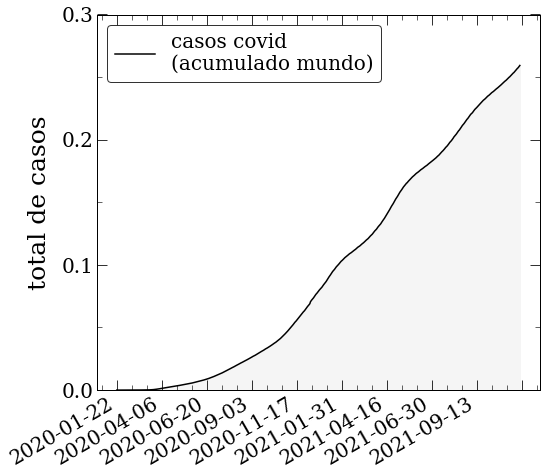

In [1031]:
fig, ax = plt.subplots(1, 1, tight_layout=True)
fig.set_size_inches(8, 7)

plt.plot(df_timeline['date'],df_timeline['total_cases'], color='k', label='casos covid\n(acumulado mundo)')
ax.fill_between(df_timeline['date'], 0, df_timeline['total_cases'], color='whitesmoke')

# font
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["axes.edgecolor"] = "black"

# plt.xlim(-10, 110)
plt.ylim(0, 0.3)

ax.tick_params(which='major',bottom=True, top=True, left=True, right=True, direction = 'in', length=10)
ax.tick_params(which='minor',bottom=True, top=True, left=True, right=True, direction = 'in', length=5)

ax.set_ylabel(r'total de casos', labelpad=10, fontsize=25)
# ax.set_xlabel(r'$time$', labelpad=10, fontsize=25)

# X-axis MARKS
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(75))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(25))

# Y-axis MARKS
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))

plt.gcf().autofmt_xdate()
plt.legend( facecolor= 'white', edgecolor = 'black')

# plt.savefig('C:/Users/costa/Downloads/tcc_1.png', format='png',transparent=True, dpi=300)
plt.show()

In [996]:
# df_timeline['cumsum'] = df_timeline['total_cases'].cumsum()
# df_timeline['change'] = np.where(df_timeline['cumsum'] > df_timeline['cumsum'].shift(), '1', '0')
# df_timeline['threshold'] = np.where(df_timeline['cumsum'] > 150, '100', '0')

In [997]:
df_seasonal = df_timeline
df_seasonal.index = pd.to_datetime(df_seasonal['date'])

In [998]:
seasonal_res = seasonal_decompose(x=df_seasonal['total_cases'], model ='additive')

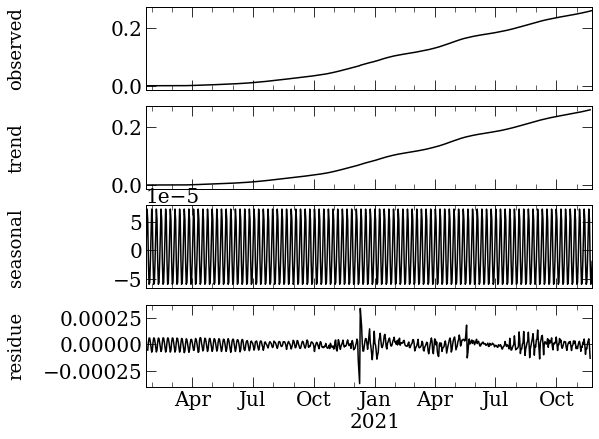

In [1034]:
fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True)
fig.set_size_inches(8, 7)

seasonal_res.observed.plot(ax=ax[0], legend=False, c='k')
ax[0].set_ylabel('observed', size =18)
ax[0].get_yaxis().set_label_coords(-0.27,0.5)

seasonal_res.trend.plot(ax=ax[1], legend=False, c='k')
ax[1].set_ylabel('trend', size =18)
ax[1].get_yaxis().set_label_coords(-0.27,0.5)

seasonal_res.seasonal.plot(ax=ax[2], legend=False, c='k')
ax[2].set_ylabel('seasonal', size =18)
ax[2].get_yaxis().set_label_coords(-0.27,0.5)

seasonal_res.resid.plot(ax=ax[3], legend=False, c='k')
ax[3].set_ylabel('residue', size =18)
ax[3].get_yaxis().set_label_coords(-0.27,0.5)


ax[0].tick_params(which='major',bottom=True, top=True, left=True, right=True, direction = 'in', length=10)
ax[0].tick_params(which='minor',bottom=True, top=True, left=True, right=True, direction = 'in', length=5)
ax[1].tick_params(which='major',bottom=True, top=True, left=True, right=True, direction = 'in', length=10)
ax[1].tick_params(which='minor',bottom=True, top=True, left=True, right=True, direction = 'in', length=5)
ax[2].tick_params(which='major',bottom=True, top=True, left=True, right=True, direction = 'in', length=10)
ax[2].tick_params(which='minor',bottom=True, top=True, left=True, right=True, direction = 'in', length=5)
ax[3].tick_params(which='major',bottom=True, top=True, left=True, right=True, direction = 'in', length=10)
ax[3].tick_params(which='minor',bottom=True, top=True, left=True, right=True, direction = 'in', length=5)

ax[3].set_xlabel(r'', labelpad=10, fontsize=25)

plt.savefig('C:/Users/costa/Downloads/tcc_2.png', format='png',transparent=True, dpi=300)
plt.show()

In [1000]:
threshold = 0.00017
seasonal_res.resid[seasonal_res.resid>threshold]

date
2020-12-10    0.000339
2020-12-11    0.000253
2021-05-19    0.000181
Name: resid, dtype: float64

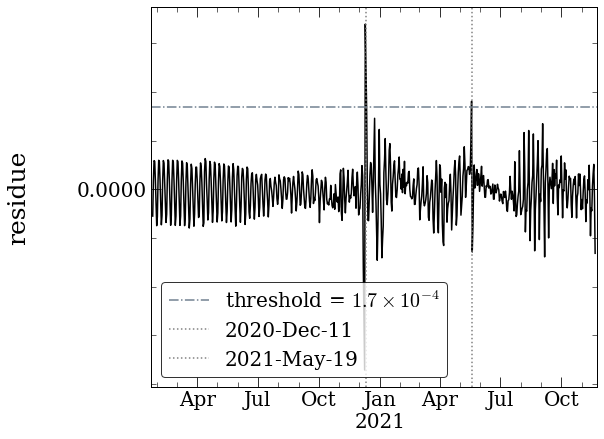

In [1036]:
fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_size_inches(8, 7)

seasonal_res.resid.plot(ax=ax, c='k', label='')
ax.set_ylabel('residue', size =25)

plt.axhline(y=threshold, color='slategrey', linestyle='-.', label='threshold = $1.7 \\times 10^{-4}$')
plt.axvline(x='2020-12-11', color='gray', linestyle=':', label='2020-Dec-11')
plt.axvline(x='2021-05-19', color='gray', linestyle=':', label='2021-May-19')

ax.get_yaxis().set_label_coords(-0.27,0.5)

ax.set_xlabel(r'', labelpad=10, fontsize=25)

ax.tick_params(which='major',bottom=True, top=True, left=True, right=True, direction = 'in', length=10)
ax.tick_params(which='minor',bottom=True, top=True, left=True, right=True, direction = 'in', length=5)


# X-axis MARKS
# ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
# ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

# Y-axis MARKS
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.0005))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.0001))

plt.legend( facecolor= 'white', edgecolor = 'black')
plt.savefig('C:/Users/costa/Downloads/tcc_4.png', format='png',transparent=True, dpi=300)
plt.show()

# Select Dates

In [1002]:
startdate = df['date'].min()
break1date = '2020-12-10'
break2date = '2021-05-19'
enddate = df['date'].max()

startdate,break1date,break2date,enddate

('2020-01-01', '2020-12-10', '2021-05-19', '2021-11-24')

In [1003]:
# date_period1 = random.choice(list(df[(df['date'] >= startdate) & (df['date'] < break1date)]['date']))
date_period1 = '2020-12-11'

In [1004]:
# date_period2 = random.choice(list(df[(df['date'] >= break1date) & (df['date'] < break2date)]['date']))
date_period2 = '2021-05-19'

In [1005]:
# date_period3 = random.choice(list(df[(df['date'] >= break2date)]['date']))
date_period3 = '2021-11-24'

In [1006]:
df_period1 = df[df['date'] == date_period1]
df_period2 = df[df['date'] == date_period2]
df_period3 = df[df['date'] == date_period3]

In [1007]:
try: 
    df_period1 = df_period1.drop(['iso_code','continent','date','tests_units'], 1)
    df_period2 = df_period2.drop(['iso_code','continent','date','tests_units'], 1)
    df_period3 = df_period3.drop(['iso_code','continent','date','tests_units'], 1)
except:
    pass  

# df_period1.columns[[1,2,3,4,5,6,7,8,9,10,11,12,18,19,20,21,22]]

C:\Users\costa\AppData\Local\Temp/ipykernel_41760/631740001.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_period1 = df_period1.drop(['iso_code','continent','date','tests_units'], 1)
C:\Users\costa\AppData\Local\Temp/ipykernel_41760/631740001.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_period2 = df_period2.drop(['iso_code','continent','date','tests_units'], 1)
C:\Users\costa\AppData\Local\Temp/ipykernel_41760/631740001.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_period3 = df_period3.drop(['iso_code','continent','date','tests_units'], 1)


# k-means Model

### clean data of period

In [1008]:
# df_period1.info()
# df_period1.loc[:, ~df_period1.columns.isin(['location',''])]
# ~df_period1.columns.isin(['location'])
# df_period1.columns[0]

In [1009]:
scaler = MinMaxScaler()
df_period1=df_period1.fillna(0) #remove nan
df_period2=df_period2.fillna(0) #remove nan
df_period3=df_period3.fillna(0) #remove nan

df_scaled_period1 = scaler.fit_transform(df_period1.iloc[:,1:].to_numpy()) #scale
df_scaled_period2 = scaler.fit_transform(df_period2.iloc[:,1:].to_numpy()) #scale
df_scaled_period3 = scaler.fit_transform(df_period3.iloc[:,1:].to_numpy()) #scale

In [1010]:
# list(df_period1.iloc[:,1:].columns)

In [1011]:
df_results1 = pd.DataFrame(df_scaled_period1, columns=list(df_period1.iloc[:,1:].columns))
df_results2 = pd.DataFrame(df_scaled_period2, columns=list(df_period2.iloc[:,1:].columns))
df_results3 = pd.DataFrame(df_scaled_period3, columns=list(df_period3.iloc[:,1:].columns))

df_results1.insert(0, "location", list(df_period1['location']), False)
df_results2.insert(0, "location", list(df_period2['location']), False)
df_results3.insert(0, "location", list(df_period3['location']), False)


In [1012]:
df_results1.insert(0, "iso_code", list(df[df['date'] == date_period1]['iso_code']), False)
df_results2.insert(0, "iso_code", list(df[df['date'] == date_period2]['iso_code']), False)
df_results3.insert(0, "iso_code", list(df[df['date'] == date_period3]['iso_code']), False)

In [1013]:
# df_results1.iloc[:,1:]

In [1014]:
# df_results1.head()

### Fit + predict model

In [1015]:
cluster_var = 3
kmeans = KMeans(n_clusters=cluster_var)

In [1016]:
kmeansfit1 = kmeans.fit(df_results1.iloc[:,2:])
kmeansfit2 = kmeans.fit(df_results2.iloc[:,2:])
kmeansfit3 = kmeans.fit(df_results3.iloc[:,2:])

In [1017]:
kmeans_predict1 = kmeansfit1.predict(df_results1.iloc[:,2:])
kmeans_predict2 = kmeansfit2.predict(df_results2.iloc[:,2:])
kmeans_predict3 = kmeansfit3.predict(df_results3.iloc[:,2:])

In [1018]:
df_results1.insert(1, "kmeans", kmeans_predict1, False)
df_results2.insert(1, "kmeans", kmeans_predict2, False)
df_results3.insert(1, "kmeans", kmeans_predict3, False)

### PCA analysis

In [1019]:
pca = PCA(n_components = 2)

cols1 = df_results1.columns[3:]
cols2 = df_results1.columns[3:]
cols3 = df_results1.columns[3:]
# print(cols)


df_results1.insert(3, "x_pca", pca.fit_transform(df_results1[cols])[:,0], False)
df_results1.insert(4, "y_pca", pca.fit_transform(df_results1[cols])[:,1], False)

df_results2.insert(3, "x_pca", pca.fit_transform(df_results2[cols])[:,0], False)
df_results2.insert(4, "y_pca", pca.fit_transform(df_results2[cols])[:,1], False)

df_results3.insert(3, "x_pca", pca.fit_transform(df_results3[cols])[:,0], False)
df_results3.insert(4, "y_pca", pca.fit_transform(df_results3[cols])[:,1], False)

# df_results1

### check values

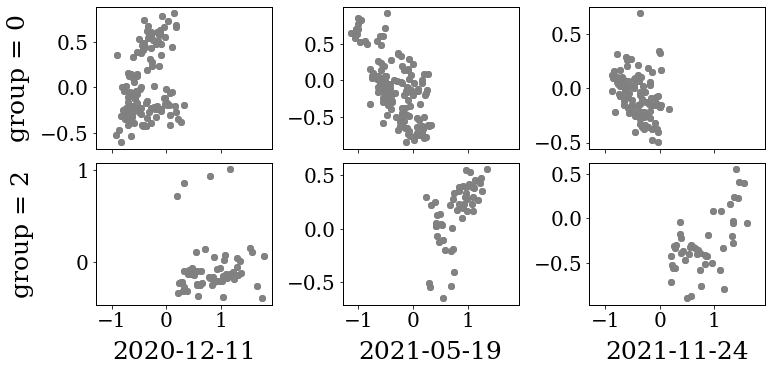

In [1119]:
fig, ax = plt.subplots(ncols=3, nrows=2, sharex=True)
fig.set_size_inches(12, 6)
plt.subplots_adjust(top = 0.7, bottom=0.01, hspace=0.1, wspace=0.4)

for val in range (cluster_var):
    val=0
    x1 = df_results1[df_results1['kmeans'] == val]['x_pca']
    y1 = df_results1[df_results1['kmeans'] == val]['y_pca']
    
    x2 = df_results2[df_results2['kmeans'] == val]['x_pca']
    y2 = df_results2[df_results2['kmeans'] == val]['y_pca']

    x3 = df_results3[df_results3['kmeans'] == val]['x_pca']
    y3 = df_results3[df_results3['kmeans'] == val]['y_pca']

    ax[0][0].scatter(x1,y1,alpha=0.7,c='gray')
    ax[0][1].scatter(x2,y2,alpha=0.7,c='gray')
    ax[0][2].scatter(x3,y3,alpha=0.7,c='gray')

for val in range (cluster_var):
    val=2
    x1 = df_results1[df_results1['kmeans'] == val]['x_pca']
    y1 = df_results1[df_results1['kmeans'] == val]['y_pca']
    
    x2 = df_results2[df_results2['kmeans'] == val]['x_pca']
    y2 = df_results2[df_results2['kmeans'] == val]['y_pca']

    x3 = df_results3[df_results3['kmeans'] == val]['x_pca']
    y3 = df_results3[df_results3['kmeans'] == val]['y_pca']

    ax[1][0].scatter(x1,y1,alpha=0.7,c='gray')
    ax[1][1].scatter(x2,y2,alpha=0.7,c='gray')
    ax[1][2].scatter(x3,y3,alpha=0.7,c='gray')

# for val in range (cluster_var):
#     x1 = df_results1[df_results1['kmeans'] == val]['x_pca']
#     y1 = df_results1[df_results1['kmeans'] == val]['y_pca']
    
#     x2 = df_results2[df_results2['kmeans'] == val]['x_pca']
#     y2 = df_results2[df_results2['kmeans'] == val]['y_pca']

#     x3 = df_results3[df_results3['kmeans'] == val]['x_pca']
#     y3 = df_results3[df_results3['kmeans'] == val]['y_pca']

#     ax[1][0].scatter(x1,y1,alpha=0.7)
#     ax[1][1].scatter(x2,y2,alpha=0.7)
#     ax[1][2].scatter(x3,y3,alpha=0.7)

ax[0][0].set_ylabel(r'group = 0', labelpad=10, fontsize=25)
ax[1][0].set_ylabel(r'group = 2', labelpad=10, fontsize=25)
ax[1][0].get_yaxis().set_label_coords(-0.35,0.5)

ax[1][0].set_xlabel(r'2020-12-11', labelpad=10, fontsize=25)
ax[1][1].set_xlabel(r'2021-05-19', labelpad=10, fontsize=25)
ax[1][2].set_xlabel(r'2021-11-24', labelpad=10, fontsize=25)
plt.show()

###### attention !!! run only once

In [1025]:
# 0 <<>> 0 (adjust color code for all 3 dates ... as they are randomly assingned by kmeans)
df_results1['kmeans'].replace({0: 0, 0: 0}, inplace=True)

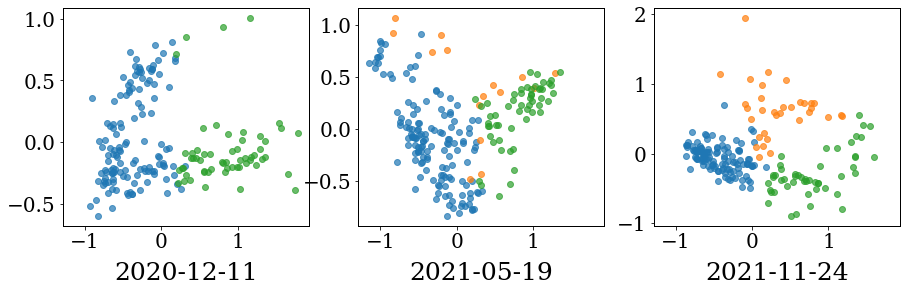

In [1120]:
fig, ax = plt.subplots(ncols=3, nrows=1, sharex=True)
fig.set_size_inches(15, 4)

for val in range (cluster_var):
    x1 = df_results1[df_results1['kmeans'] == val]['x_pca']
    y1 = df_results1[df_results1['kmeans'] == val]['y_pca']
    
    x2 = df_results2[df_results2['kmeans'] == val]['x_pca']
    y2 = df_results2[df_results2['kmeans'] == val]['y_pca']

    x3 = df_results3[df_results3['kmeans'] == val]['x_pca']
    y3 = df_results3[df_results3['kmeans'] == val]['y_pca']

    ax[0].scatter(x1,y1,alpha=0.7)
    ax[1].scatter(x2,y2,alpha=0.7)
    ax[2].scatter(x3,y3,alpha=0.7)
    
ax[0].set_xlabel(r'2020-12-11', labelpad=10, fontsize=25)
ax[1].set_xlabel(r'2021-05-19', labelpad=10, fontsize=25)
ax[2].set_xlabel(r'2021-11-24', labelpad=10, fontsize=25)
    
plt.show()

# Save data

In [1079]:
df_final_1 = pd.DataFrame()
df_final_2 = pd.DataFrame()
df_final_3 = pd.DataFrame()

In [1084]:
df_final_1['Period'] = '2020-Dec-11'
df_final_1['Country'] = df_results1['iso_code']
df_final_1['kmeans'] = df_results1['kmeans']
df_final_1['Period'] = '2020-Dec-11'

df_final_2['Period'] = '2021-May-19'
df_final_2['Country'] = df_results2['iso_code']
df_final_2['kmeans'] = df_results2['kmeans']
df_final_2['Period'] = '2021-May-19'

df_final_3['Period'] = '2021-Nov-24'
df_final_3['Country'] = df_results3['iso_code']
df_final_3['kmeans'] = df_results3['kmeans']
df_final_3['Period'] = '2021-Nov-24'


In [1085]:
df_final = pd.concat([df_final_1, df_final_2,df_final_3], axis=0)

In [1088]:
df_final.to_csv('kmeans-by-country.csv', index=False )

# Choropleth Maps 

https://costargc.github.io/MBA-USP-TCC/choropleth.html